In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [20]:
# Load datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [21]:
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)
print("\nTrain-Test Split Ratio:", len(train_df)/(len(train_df) + len(test_df)))

Train Dataset Shape: (6241, 3)
Test Dataset Shape: (1759, 3)

Train-Test Split Ratio: 0.780125


**Class Distribution Analysis**

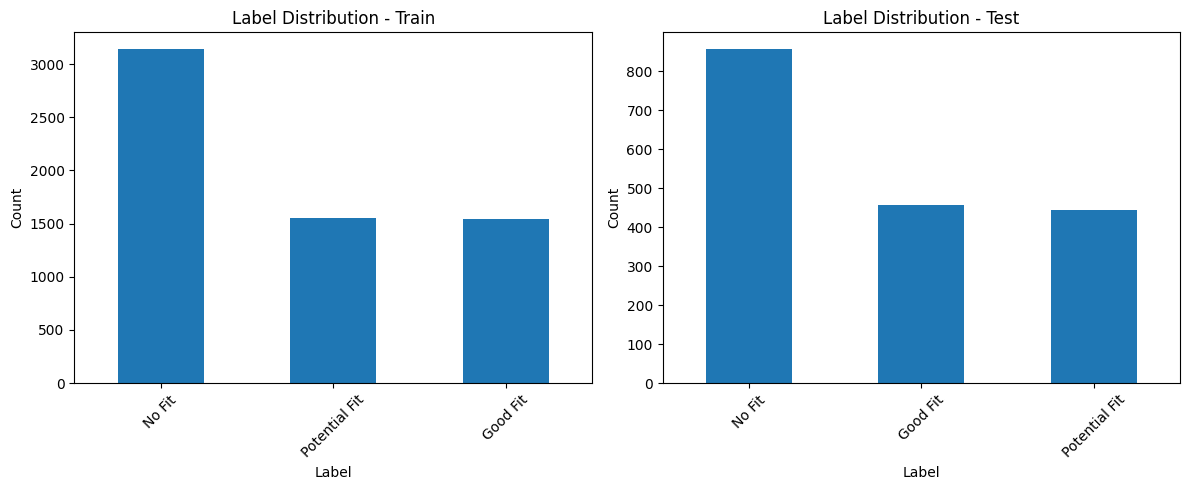

In [ ]:
# 2. C
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution - Train')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
test_df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution - Test')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
#Print percentages
print("\nTrain Label Distribution:")
print(train_df['label'].value_counts(normalize=True) * 100)
print("\nTest Label Distribution:")
print(test_df['label'].value_counts(normalize=True) * 100)



Train Label Distribution:
label
No Fit           50.360519
Potential Fit    24.931902
Good Fit         24.707579
Name: proportion, dtype: float64

Test Label Distribution:
label
No Fit           48.720864
Good Fit         26.037521
Potential Fit    25.241615
Name: proportion, dtype: float64


**Text Length Analysis**

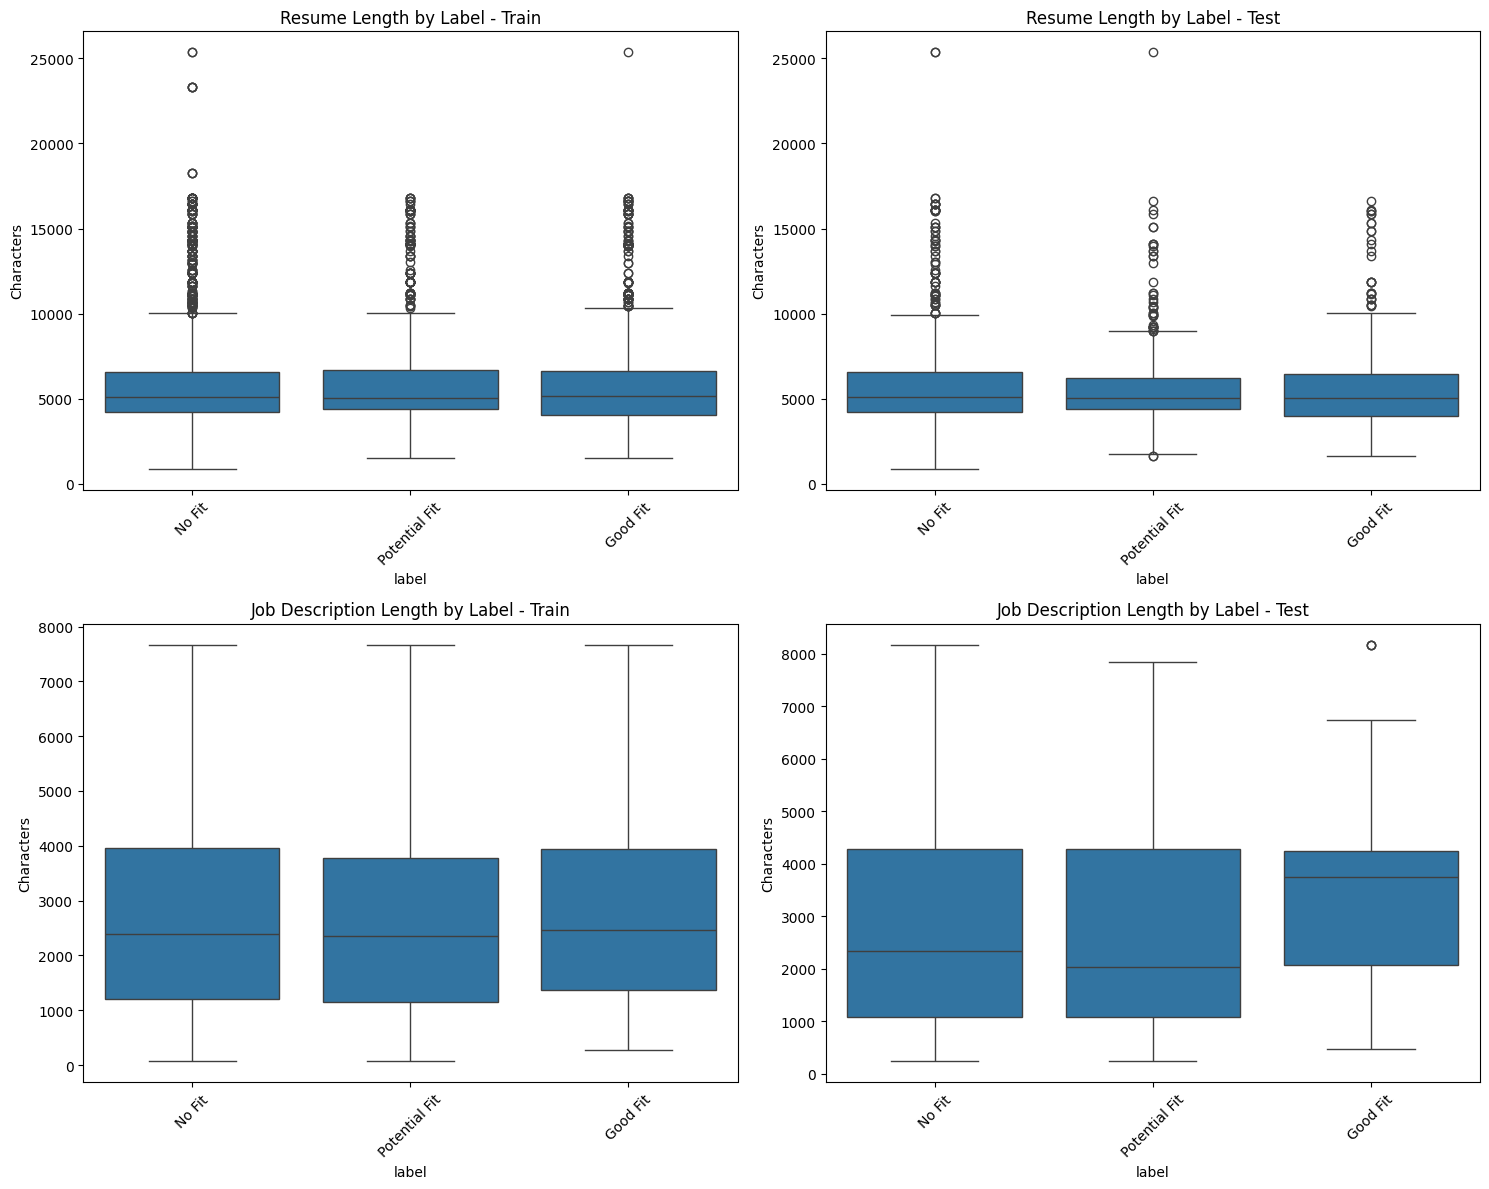

In [ ]:

def add_length_features(df):
    df['resume_length'] = df['resume_text'].str.len()
    df['job_desc_length'] = df['job_description_text'].str.len()
    df['resume_word_count'] = df['resume_text'].apply(lambda x: len(str(x).split()))
    df['job_desc_word_count'] = df['job_description_text'].apply(lambda x: len(str(x).split()))
    return df

train_df = add_length_features(train_df)
test_df = add_length_features(teis growing too long we must crop it at blplt.subplots(2, 2, figsize=(15, 12))

# Resume length
sns.boxplot(x='label', y='resume_length', data=train_df, ax=ax1)
ax1.set_title('Resume Length by Label - Train')
ax1.set_ylabel('Characters')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='label', y='resume_length', data=test_df, ax=ax2)
ax2.set_title('Resume Length by Label - Test')
ax2.set_ylabel('Characters')
ax2.tick_params(axis='x', rotation=45)

# Job description length
sns.boxplot(x='label', y='job_desc_length', data=train_df, ax=ax3)
ax3.set_title('Job Description Length by Label - Train')
ax3.set_ylabel('Characters')
ax3.tick_params(axis='x', rotation=45)

sns.boxplot(x='label', y='job_desc_length', data=test_df, ax=ax4)
ax4.set_title('Job Description Length by Label - Test')
ax4.set_ylabel('Characters')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Word Count Statistics**

In [9]:
print("\nTrain Set Word Count Statistics:")
print("\nResume Word Count:")
print(train_df.groupby('label')['resume_word_count'].describe())
print("\nJob Description Word Count:")
print(train_df.groupby('label')['job_desc_word_count'].describe())

print("\nTest Set Word Count Statistics:")
print("\nResume Word Count:")
print(test_df.groupby('label')['resume_word_count'].describe())
print("\nJob Description Word Count:")
print(test_df.groupby('label')['job_desc_word_count'].describe())


Train Set Word Count Statistics:

Resume Word Count:
                count        mean         std    min     25%    50%    75%  \
label                                                                        
Good Fit       1542.0  704.920882  382.560098  154.0  478.25  622.5  816.0   
No Fit         3143.0  707.854598  398.213301   84.0  488.00  618.0  805.0   
Potential Fit  1556.0  711.572622  387.682934  154.0  501.00  614.0  813.0   

                  max  
label                  
Good Fit       2738.0  
No Fit         3134.0  
Potential Fit  2230.0  

Job Description Word Count:
                count        mean         std   min    25%    50%    75%  \
label                                                                      
Good Fit       1542.0  384.646563  226.387602  34.0  194.0  349.0  532.0   
No Fit         3143.0  370.446707  242.071483  11.0  158.0  319.0  532.0   
Potential Fit  1556.0  360.785347  244.972418  11.0  157.0  312.0  513.5   

                  max  
l


Token Statistics:

Resume Length Stats:
Mean: 1185.0
Median: 1036.0
Min: 200
Max: 4307
95th percentile: 2407.0

Job Description Length Stats:
Mean: 515.1
Median: 440.0
Min: 15
Max: 1617
95th percentile: 1094.0

Most Common Tokens:
Token 11 (,): 740607
Token 290 ( and): 440597
Token 13 (.): 348154
Token 284 ( to): 174322
Token 286 ( of): 150363
Token 262 ( the): 142341
Token 12 (-): 120711
Token 287 ( in): 118809
Token 329 ( for): 98212
Token 198 (
): 95267
Token 351 ( with): 91537
Token 14 (/): 77936
Token 220 ( ): 76700
Token 25 (:): 69583
Token 257 ( a): 67798
Token 1366 ( data): 50187
Token 319 ( on): 44708
Token 357 ( (): 44341
Token 355 ( as): 35628
Token 8 ()): 31081


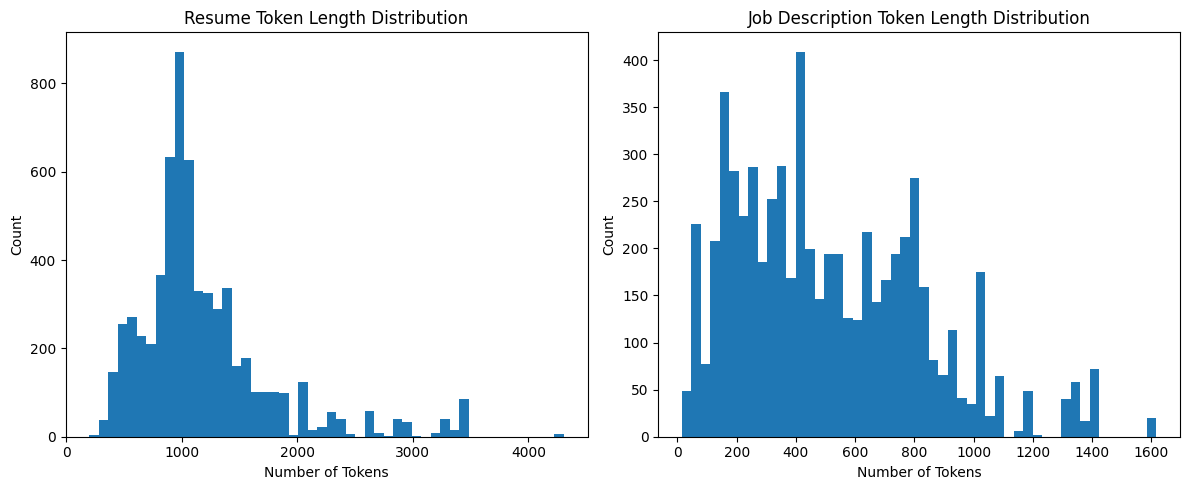


Sequences exceeding block size (1024):
Resumes: 3184, 51.02%
Jobs: 525, 8.41%


In [6]:
from minGPT.mingpt.bpe import BPETokenizer
import torch

tokenizer = BPETokenizer()

def compute_token_statistics(data_df, tokenizer):
    """Compute statistics about token lengths and most common tokens"""
    
    # Store lengths and tokens
    resume_lengths = []
    job_lengths = []
    all_tokens = []
    
    for _, row in data_df.iterrows():
        # Get tokens for resume and job separately
        resume_tokens = tokenizer(row['resume_text'])
        job_tokens = tokenizer(row['job_description_text'])
        
        # Store lengths
        resume_lengths.append(len(resume_tokens[0]))  # Remove batch dimension
        job_lengths.append(len(job_tokens[0]))
        
        # Store all tokens for frequency analysis
        all_tokens.extend(resume_tokens[0].tolist())
        all_tokens.extend(job_tokens[0].tolist())
    
    # Convert to numpy for statistics
    resume_lengths = np.array(resume_lengths)
    job_lengths = np.array(job_lengths)
    
    # Most common tokens
    token_freq = Counter(all_tokens)
    most_common = token_freq.most_common(20)
    
    # Print statistics
    print("\nToken Statistics:")
    print("\nResume Length Stats:")
    print(f"Mean: {resume_lengths.mean():.1f}")
    print(f"Median: {np.median(resume_lengths):.1f}")
    print(f"Min: {resume_lengths.min()}")
    print(f"Max: {resume_lengths.max()}")
    print(f"95th percentile: {np.percentile(resume_lengths, 95):.1f}")
    
    print("\nJob Description Length Stats:")
    print(f"Mean: {job_lengths.mean():.1f}")
    print(f"Median: {np.median(job_lengths):.1f}")
    print(f"Min: {job_lengths.min()}")
    print(f"Max: {job_lengths.max()}")
    print(f"95th percentile: {np.percentile(job_lengths, 95):.1f}")
    
    print("\nMost Common Tokens:")
    for token_id, count in most_common:
        # Decode token if possible
        try:
            token_text = tokenizer.decode(torch.tensor([token_id]))
            print(f"Token {token_id} ({token_text}): {count}")
        except:
            print(f"Token {token_id}: {count}")
    
    # Plot distributions
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(resume_lengths, bins=50)
    plt.title('Resume Token Length Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    plt.hist(job_lengths, bins=50)
    plt.title('Job Description Token Length Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'resume_lengths': resume_lengths,
        'job_lengths': job_lengths,
        'token_frequencies': token_freq
    }


stats = compute_token_statistics(train_df, tokenizer)

# Check how many sequences exceed block size
block_size = 1024
print(f"\nSequences exceeding block size ({block_size}):")
print(f"Resumes: {(stats['resume_lengths'] > block_size).sum()}, {(stats['resume_lengths'] > block_size).sum()/len(train_df)*100:.2f}%")
print(f"Jobs: {(stats['job_lengths'] > block_size).sum()}, {(stats['job_lengths'] > block_size).sum()/len(train_df)*100:.2f}%")


Token Statistics:

Resume Length Stats:
Mean: 1165.2
Median: 1044.0
Min: 200
Max: 4307
95th percentile: 2245.2

Job Description Length Stats:
Mean: 554.6
Median: 432.0
Min: 57
Max: 1587
95th percentile: 1284.0

Most Common Tokens:
Token 11: 212234
Token 290: 123699
Token 13: 98315
Token 284: 50980
Token 286: 42397
Token 262: 40960
Token 12: 34844
Token 287: 34589
Token 198: 32682
Token 329: 27874
Token 351: 25394
Token 14: 21930
Token 25: 20647
Token 257: 19787
Token 220: 18686
Token 1366: 14640
Token 319: 13626
Token 357: 11727
Token 355: 9382
Token 393: 9079


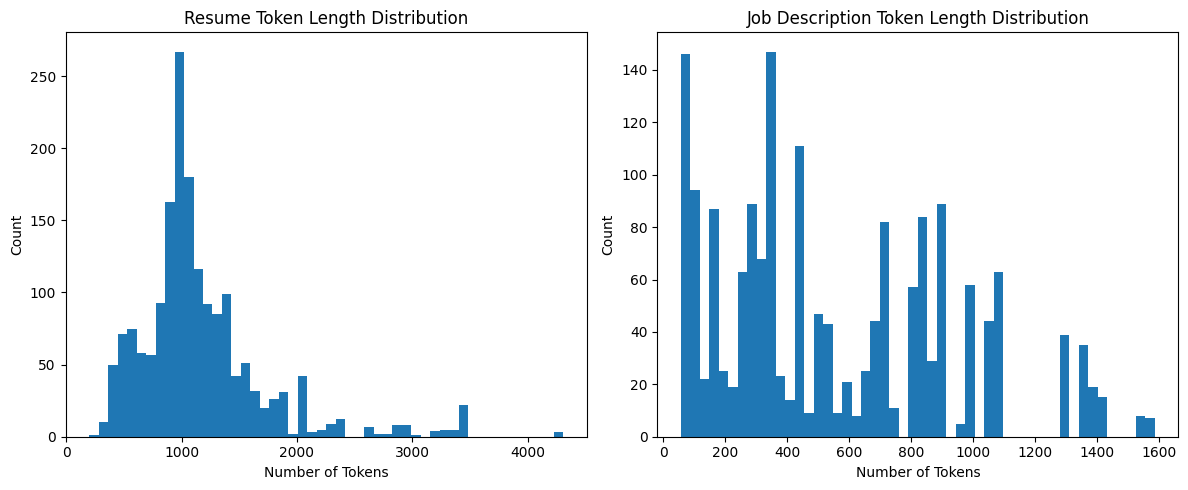


Sequences exceeding block size (1024):
Resumes: 906
Jobs: 230


In [5]:
stats = compute_token_statistics(test_df, tokenizer)

# Check how many sequences exceed block size
block_size = 1024
print(f"\nSequences exceeding block size ({block_size}):")
print(f"Resumes: {(stats['resume_lengths'] > block_size).sum()}")
print(f"Jobs: {(stats['job_lengths'] > block_size).sum()}")

**Common Words Analysis**

[nltk_data] Downloading package punkt to /home/marwan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/marwan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/marwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


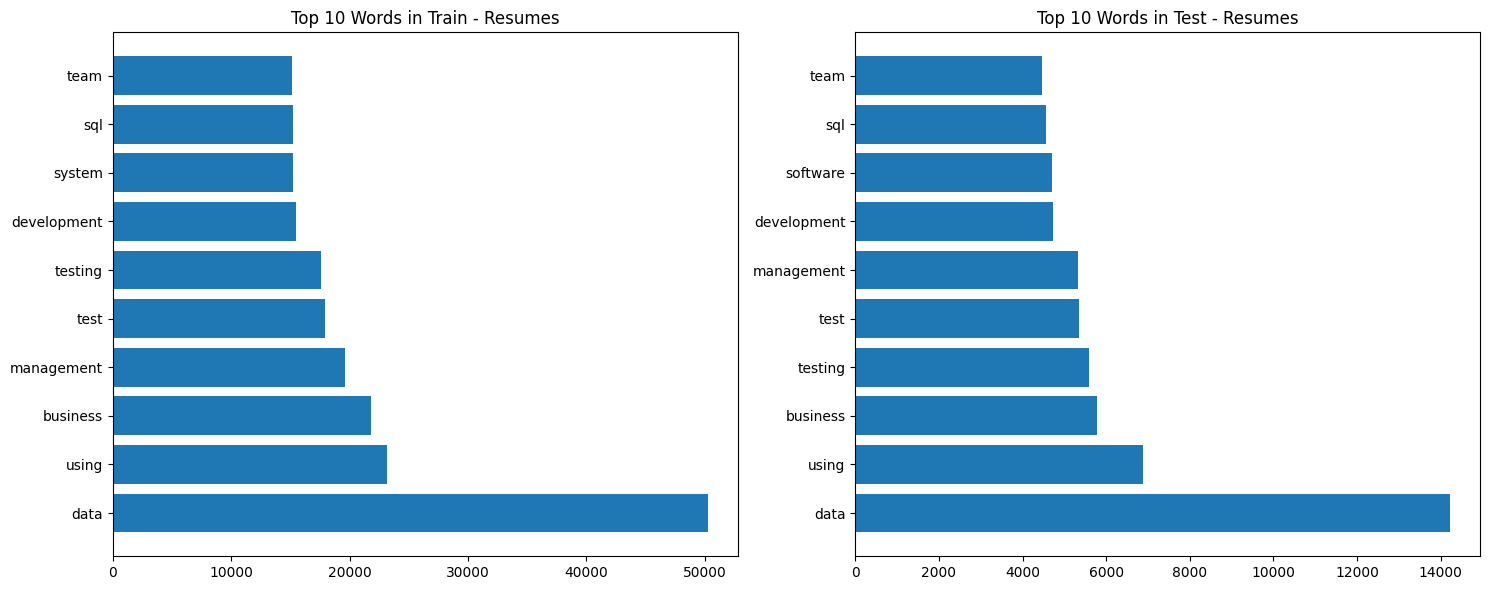

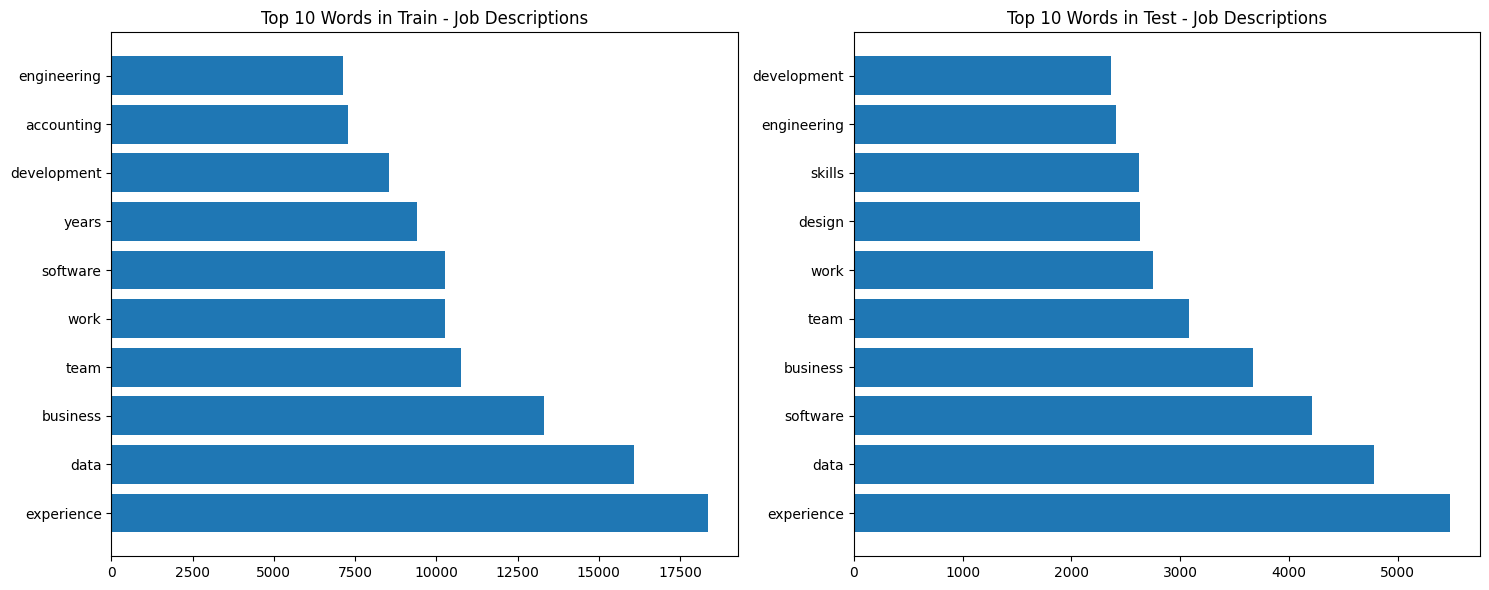

In [12]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_words(text_series, n=20):
    words = []
    for text in text_series:
        tokens = word_tokenize(str(text).lower())
        words.extend([word for word in tokens if word.isalnum() and word not in stop_words])
    return pd.DataFrame(Counter(words).most_common(n), columns=['Word', 'Count'])

# Compare top words between train and test
def compare_top_words(train_series, test_series, title):
    train_words = get_top_words(train_series)
    test_words = get_top_words(test_series)
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.barh(train_words['Word'][:10], train_words['Count'][:10])
    plt.title(f'Top 10 Words in Train - {title}')
    
    plt.subplot(1, 2, 2)
    plt.barh(test_words['Word'][:10], test_words['Count'][:10])
    plt.title(f'Top 10 Words in Test - {title}')
    
    plt.tight_layout()
    plt.show()

compare_top_words(train_df['resume_text'], test_df['resume_text'], 'Resumes')
compare_top_words(train_df['job_description_text'], test_df['job_description_text'], 'Job Descriptions')


**Text Overlap Analysis**

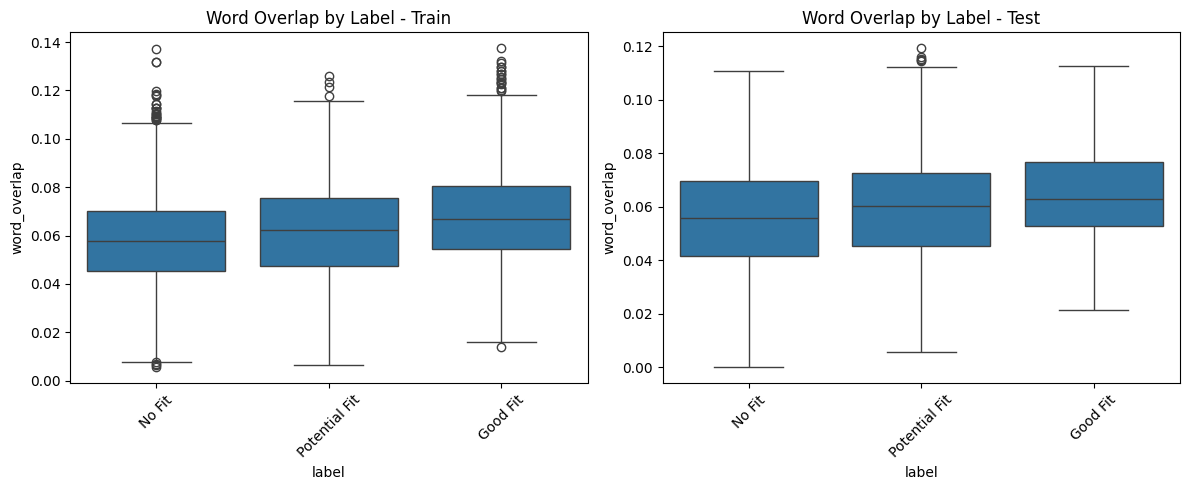

In [13]:
# 6. 
def calculate_word_overlap(resume, job_desc):
    resume_words = set(str(resume).lower().split())
    job_words = set(str(job_desc).lower().split())
    return len(resume_words.intersection(job_words)) / len(resume_words.union(job_words))

train_df['word_overlap'] = train_df.apply(
    lambda x: calculate_word_overlap(x['resume_text'], x['job_description_text']), axis=1)
test_df['word_overlap'] = test_df.apply(
    lambda x: calculate_word_overlap(x['resume_text'], x['job_description_text']), axis=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='word_overlap', data=train_df)
plt.title('Word Overlap by Label - Train')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='word_overlap', data=test_df)
plt.title('Word Overlap by Label - Test')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
from minGPT.mingpt.bpe import BPETokenizer
import torch

tokenizer = BPETokenizer()
pad_token = "<|endoftext|>"

print(tokenizer("<|endoftext|>"))
print(tokenizer.decode(torch.tensor([50256])))

tensor([[  27,   91,  437, 1659, 5239,   91,   29]])
<|endoftext|>


In [18]:
print(tokenizer("<|endoftext|>"))  # {'input_ids': [50256], 'attention_mask': [1]} or just [50256]
print(tokenizer.decode(torch.tensor([50256]))) 

tensor([[  27,   91,  437, 1659, 5239,   91,   29]])
<|endoftext|>


**Data Quality Checks**

In [14]:
print("\nMissing Values in Train:")
print(train_df.isnull().sum())
print("\nMissing Values in Test:")
print(test_df.isnull().sum())

print("\nDuplicate Rows in Train:", train_df.duplicated().sum())
print("Duplicate Rows in Test:", test_df.duplicated().sum())



Missing Values in Train:
resume_text             0
job_description_text    0
label                   0
resume_length           0
job_desc_length         0
resume_word_count       0
job_desc_word_count     0
word_overlap            0
dtype: int64

Missing Values in Test:
resume_text             0
job_description_text    0
label                   0
resume_length           0
job_desc_length         0
resume_word_count       0
job_desc_word_count     0
word_overlap            0
dtype: int64

Duplicate Rows in Train: 1
Duplicate Rows in Test: 0


**Distribution Similarity Test**

In [16]:
def compare_distributions(train_series, test_series, feature_name):
    from scipy import stats
    
    statistic, pvalue = stats.ks_2samp(train_series, test_series)
    print(f"\nKolmogorov-Smirnov test for {feature_name}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {pvalue:.4f}")

compare_distributions(train_df['resume_length'], test_df['resume_length'], 'Resume Length')
compare_distributions(train_df['job_desc_length'], test_df['job_desc_length'], 'Job Description Length')
compare_distributions(train_df['word_overlap'], test_df['word_overlap'], 'Word Overlap')




Kolmogorov-Smirnov test for Resume Length:
Statistic: 0.0232
P-value: 0.4420

Kolmogorov-Smirnov test for Job Description Length:
Statistic: 0.1182
P-value: 0.0000

Kolmogorov-Smirnov test for Word Overlap:
Statistic: 0.0431
P-value: 0.0119


- train and test sets are well-balanced in terms of resume lengths
- model might encounter job descriptions of different lengths than what it was trained on (might require length normalization)
- word overlap patterns differ between train and test sets

In [25]:

def find_exact_duplicates(csv_path):
    """
    Find exact duplicate job descriptions in a CSV file
    
    Args:
        csv_path (str): Path to the CSV file
    
    Returns:
        DataFrame: Duplicate job descriptions with their count
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # Count occurrences of each unique job description
    duplicate_counts = df['job_description_text'].value_counts()
    
    # Filter for descriptions with more than one occurrence
    exact_duplicates = duplicate_counts[duplicate_counts > 1]
    
    return exact_duplicates

def print_duplicate_details(csv_path):
    """
    Print details of exact duplicate job descriptions
    
    Args:
        csv_path (str): Path to the CSV file
    """
    # Find exact duplicates
    duplicates = find_exact_duplicates(csv_path)
    
    print(f"Total Unique Duplicates: {len(duplicates)}")
    print("\nDuplicate Job Descriptions:")
    
    for description, count in duplicates.items():
        print(f"\nDescription (first 100 chars): {description[:100]}...")
        print(f"Number of Duplicates: {count}")


csv_path = 'data/train.csv'
print_duplicate_details(csv_path)

Total Unique Duplicates: 277

Duplicate Job Descriptions:

Description (first 100 chars): Calling all innovators  find your future at Fiserv.
Were Fiserv, a global leader in Fintech and paym...
Number of Duplicates: 111

Description (first 100 chars): Job Title: Senior AccountantLocation: Atlanta, GA (Hybrid)Duration: 12+ Months (Contract)
The candid...
Number of Duplicates: 93

Description (first 100 chars): Hello,Greetings from DevCare SolutionsI got an Opening with our direct client in Michigan *Need Only...
Number of Duplicates: 85

Description (first 100 chars): Role - Business Analyst - Mobile Location - Louisville, KY (Onsite) 
Responsibilities:Evaluating bus...
Number of Duplicates: 83

Description (first 100 chars): The Senior Manager, Data Architecture & Data Engineering is responsible for translating business str...
Number of Duplicates: 83

Description (first 100 chars): Job Description
Job Title: Salesforce Communication Cloud Business AnalystJob Type: Full-timeJob Loc...


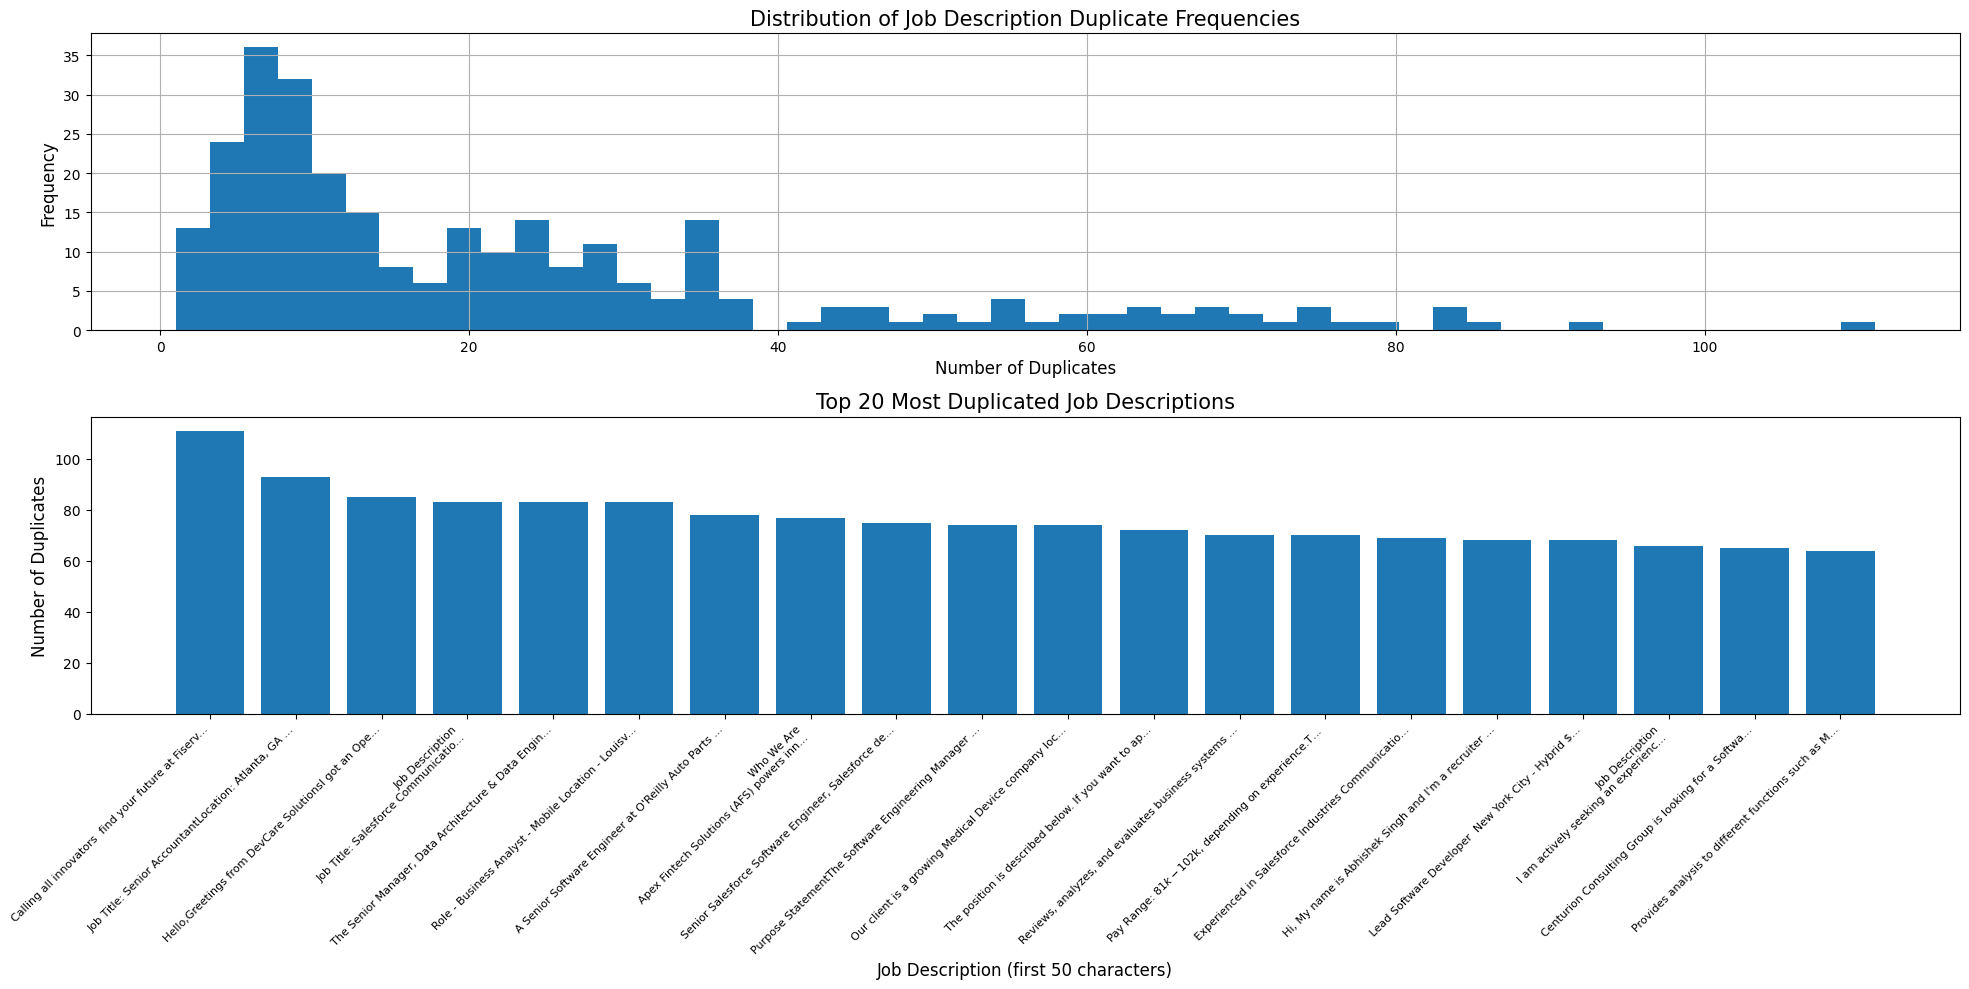


Duplicate Analysis Summary:
Total Descriptions: 6241
Unique Descriptions: 280

Duplicate Count Summary:
count    280.000000
mean      22.289286
std       20.714614
min        1.000000
25%        7.000000
50%       14.500000
75%       29.250000
max      111.000000
Name: duplicate_count, dtype: float64

Top 10 Most Duplicated Job Descriptions:
Duplicates: 111
Description (first 100 chars): Calling all innovators  find your future at Fiserv.
Were Fiserv, a global leader in Fintech and paym...

Duplicates: 93
Description (first 100 chars): Job Title: Senior AccountantLocation: Atlanta, GA (Hybrid)Duration: 12+ Months (Contract)
The candid...

Duplicates: 85
Description (first 100 chars): Hello,Greetings from DevCare SolutionsI got an Opening with our direct client in Michigan *Need Only...

Duplicates: 83
Description (first 100 chars): Job Description
Job Title: Salesforce Communication Cloud Business AnalystJob Type: Full-timeJob Loc...

Duplicates: 83
Description (first 100 chars): The 

In [30]:
def plot_duplicate_frequencies(df):
    """
    Analyze and plot job description duplicate frequencies
    
    Args:
        df (pandas.DataFrame): DataFrame with job descriptions
    
    Returns:
        dict: Duplicate frequency information
    """
    # Count duplicates
    duplicate_info = df.groupby('job_description_text').size().reset_index(name='duplicate_count')
    
    # Sort by duplicate count in descending order
    duplicate_info_sorted = duplicate_info.sort_values('duplicate_count', ascending=False)
    
    # Plotting
    plt.figure(figsize=(20, 10))
    
    # Histogram of duplicate frequencies
    plt.subplot(2, 1, 1)
    duplicate_info_sorted['duplicate_count'].hist(bins=50)
    plt.title('Distribution of Job Description Duplicate Frequencies', fontsize=15)
    plt.xlabel('Number of Duplicates', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Top 20 most duplicated descriptions
    plt.subplot(2, 1, 2)
    top_20 = duplicate_info_sorted.head(20)
    
    # Create a bar plot with shortened descriptions
    plt.bar(
        [desc[:50] + '...' for desc in top_20['job_description_text']], 
        top_20['duplicate_count']
    )
    plt.title('Top 20 Most Duplicated Job Descriptions', fontsize=15)
    plt.xlabel('Job Description (first 50 characters)', fontsize=12)
    plt.ylabel('Number of Duplicates', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Return detailed information
    return {
        'total_descriptions': len(df),
        'unique_descriptions': len(duplicate_info),
        'duplicate_summary': duplicate_info_sorted['duplicate_count'].describe(),
        'top_10_duplicates': duplicate_info_sorted.head(10)
    }

duplicate_analysis = plot_duplicate_frequencies(train_df)

# Print detailed analysis
print("\nDuplicate Analysis Summary:")
print(f"Total Descriptions: {duplicate_analysis['total_descriptions']}")
print(f"Unique Descriptions: {duplicate_analysis['unique_descriptions']}")

print("\nDuplicate Count Summary:")
print(duplicate_analysis['duplicate_summary'])

print("\nTop 10 Most Duplicated Job Descriptions:")
for index, row in duplicate_analysis['top_10_duplicates'].iterrows():
    print(f"Duplicates: {row['duplicate_count']}")
    print(f"Description (first 100 chars): {row['job_description_text'][:100]}...")
    print()